In [ ]:
!pip install pycaret
from pycaret.classification import * 

In [3]:
import pandas as pd
train_data= pd.read_csv("C:\\Users\\rajsu\\Downloads\\keggle csv(1).csv") 
train_data.head()

,BookingStatus,Wno,ClassOfTravel,JourneyDate,Weekend,Month-of-journey,Days,Upcoming-Festival-Weekends,Waitlist-cancellations,Allotted-seats,Astatus
0,WL,32,SL,2017-01-08,1,1,8,7,9,8,0
1,WL,41,SL,2017-01-08,1,1,8,4,7,31,0
2,WL,1,2A,2017-01-15,1,1,15,3,3,25,1
3,WL,13,SL,2017-01-15,1,1,15,3,8,24,1
4,WL,17,3A,2017-01-15,1,1,15,3,1,8,0


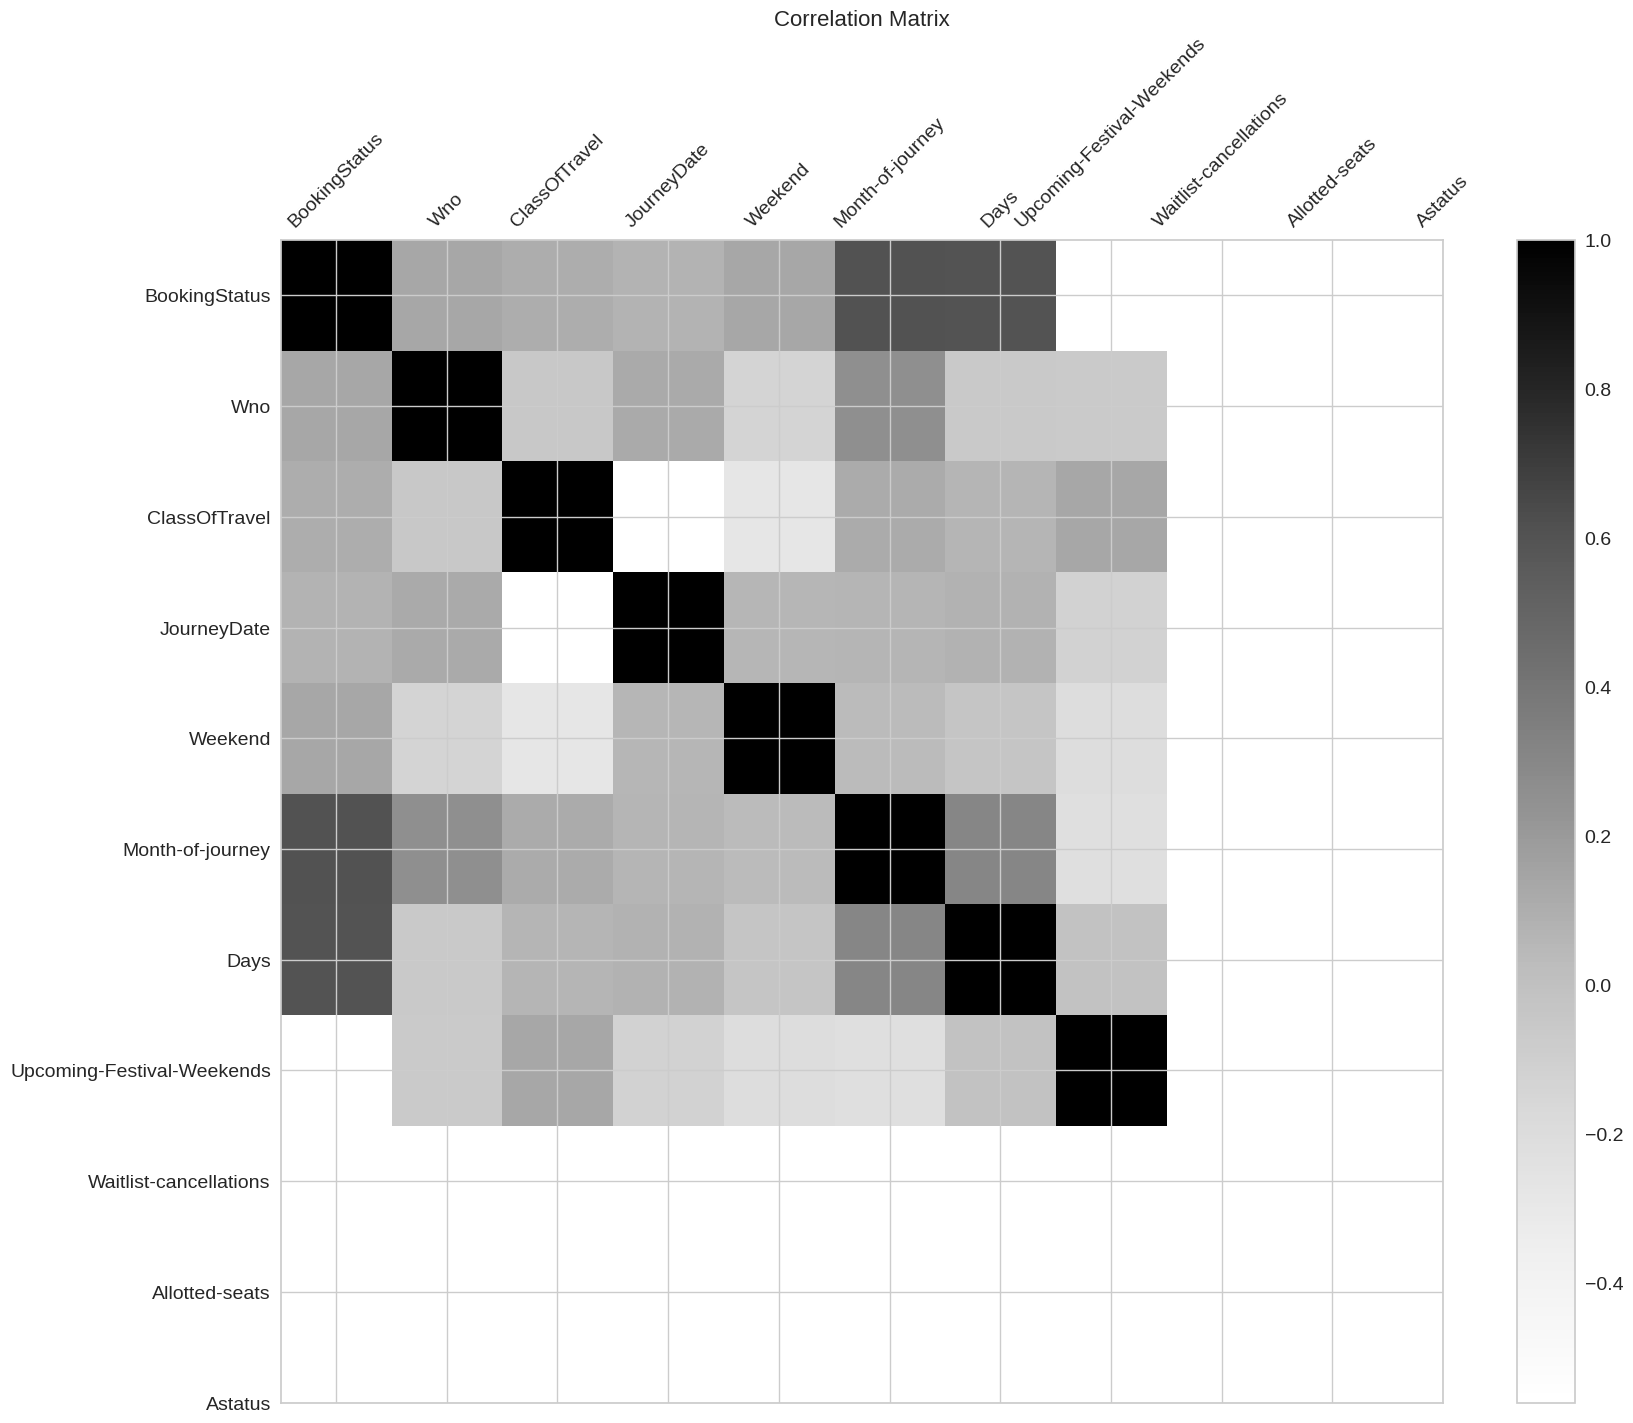

In [4]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(19, 15))
plt.matshow(train_data.corr(), fignum=f.number)
plt.xticks(range(train_data.shape[1]), train_data.columns, fontsize=14, rotation=45)
plt.yticks(range(train_data.shape[1]), train_data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

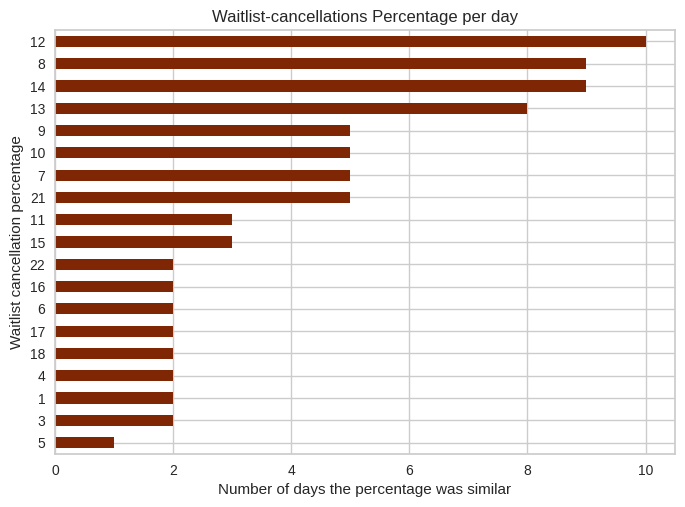

In [5]:
wt = train_data['Waitlist-cancellations'].value_counts().sort_values().plot(kind = 'barh',lw=2, colormap='Oranges_r',title="Waitlist-cancellations Percentage per day")
wt.set_xlabel("Number of days the percentage was similar")
wt.set_ylabel("Waitlist cancellation percentage");

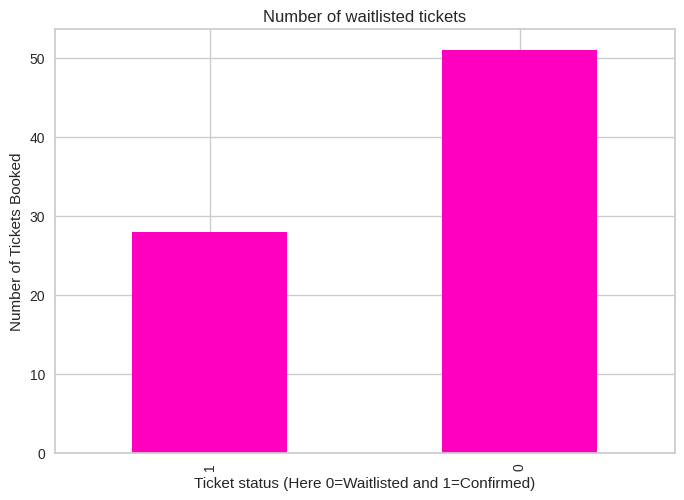

In [6]:
ws = train_data['Astatus'].value_counts().sort_values().plot(kind = 'bar',lw=2, colormap='gist_rainbow_r',title="Number of waitlisted tickets")
ws.set_xlabel("Ticket status (Here 0=Waitlisted and 1=Confirmed)")
ws.set_ylabel("Number of Tickets Booked");

In [7]:
model_setup=setup(data=train_data,target="Astatus")
compare_models()

,Description,Value
0,Session id,7169
1,Target,Astatus
2,Target type,Binary
3,Original data shape,"(79, 11)"
4,Transformed data shape,"(79, 13)"
5,Transformed train set shape,"(55, 13)"
6,Transformed test set shape,"(24, 13)"
7,Numeric features,7
8,Categorical features,3
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8733,0.9292,0.8000,0.8667,0.8133,0.7200,0.7369,0.5640
ridge,Ridge Classifier,0.8533,0.0000,0.9000,0.8000,0.8233,0.7061,0.7360,0.1600
lda,Linear Discriminant Analysis,0.8533,0.9542,0.9000,0.8000,0.8233,0.7061,0.7360,0.2130
gbc,Gradient Boosting Classifier,0.8133,0.8417,0.6000,0.6833,0.6233,0.5284,0.5411,0.6430
svm,SVM - Linear Kernel,0.8033,0.0000,0.7500,0.6067,0.6438,0.5266,0.5656,0.1560
et,Extra Trees Classifier,0.7967,0.7958,0.6000,0.6067,0.5705,0.4940,0.5248,0.6050
knn,K Neighbors Classifier,0.7800,0.8625,0.6000,0.5067,0.5371,0.4511,0.4667,0.4740
xgboost,Extreme Gradient Boosting,0.7633,0.8417,0.5000,0.5500,0.5000,0.3934,0.4161,0.4390
ada,Ada Boost Classifier,0.7500,0.8042,0.6500,0.5167,0.5667,0.4150,0.4331,0.4460
dt,Decision Tree Classifier,0.7233,0.6708,0.5000,0.5000,0.4700,0.3350,0.3619,0.2210


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7169, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model_setup1=setup(data=train_data,target="Astatus",normalize=True,normalize_method='zscore')
compare_models()

,Description,Value
0,Session id,700
1,Target,Astatus
2,Target type,Binary
3,Original data shape,"(79, 11)"
4,Transformed data shape,"(79, 13)"
5,Transformed train set shape,"(55, 13)"
6,Transformed test set shape,"(24, 13)"
7,Numeric features,7
8,Categorical features,3
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.8900,0.0000,0.8500,0.9000,0.8400,0.7586,0.7918,0.1820
lr,Logistic Regression,0.8733,0.9250,0.7500,0.7333,0.7267,0.6776,0.6946,0.4400
ridge,Ridge Classifier,0.8533,0.0000,0.8000,0.7500,0.7567,0.6636,0.6840,0.3690
lda,Linear Discriminant Analysis,0.8533,0.9083,0.8000,0.7500,0.7567,0.6636,0.6840,0.2410
gbc,Gradient Boosting Classifier,0.7767,0.7458,0.5500,0.5833,0.5433,0.4234,0.4420,0.4430
ada,Ada Boost Classifier,0.7600,0.7750,0.6000,0.5833,0.5767,0.4193,0.4362,0.6670
nb,Naive Bayes,0.7467,0.8083,0.5000,0.5500,0.5167,0.3619,0.3650,0.2390
rf,Random Forest Classifier,0.7433,0.7479,0.4500,0.6667,0.5133,0.3587,0.3955,0.6430
xgboost,Extreme Gradient Boosting,0.7433,0.7125,0.6000,0.6167,0.5800,0.3966,0.4245,0.2630
lightgbm,Light Gradient Boosting Machine,0.7400,0.7583,0.5500,0.6667,0.5800,0.3887,0.4127,0.2610


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=700, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
model_setup=setup(data=train_data,target="Astatus",feature_selection=True,)
compare_models()

,Description,Value
0,Session id,1152
1,Target,Astatus
2,Target type,Binary
3,Original data shape,"(79, 11)"
4,Transformed data shape,"(79, 3)"
5,Transformed train set shape,"(55, 3)"
6,Transformed test set shape,"(24, 3)"
7,Numeric features,7
8,Categorical features,3
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8700,0.9875,0.8000,0.9000,0.8067,0.7157,0.7550,0.3720
svm,SVM - Linear Kernel,0.8500,0.0000,0.6000,0.8000,0.6667,0.6260,0.6510,0.2710
ridge,Ridge Classifier,0.8500,0.0000,0.6500,0.7333,0.6600,0.5996,0.6271,0.4160
qda,Quadratic Discriminant Analysis,0.8500,0.9750,0.6500,0.7333,0.6600,0.5996,0.6271,0.3010
lda,Linear Discriminant Analysis,0.8500,0.9875,0.6500,0.7333,0.6600,0.5996,0.6271,0.3350
et,Extra Trees Classifier,0.8367,0.8708,0.7000,0.9000,0.7400,0.6299,0.6815,0.8130
knn,K Neighbors Classifier,0.8167,0.9458,0.6500,0.7833,0.6767,0.5766,0.6113,0.4430
gbc,Gradient Boosting Classifier,0.8133,0.8604,0.7000,0.7333,0.6767,0.5715,0.6073,0.4670
xgboost,Extreme Gradient Boosting,0.8033,0.9104,0.6500,0.6667,0.6300,0.5382,0.5661,0.3080
lightgbm,Light Gradient Boosting Machine,0.7667,0.8521,0.4500,0.6000,0.5000,0.4188,0.4377,0.4510


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1152, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pre_model=create_model('ada')
predict_x=predict_model(pre_model,data=train_data)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8333,1.0000,0.5000,1.0000,0.6667,0.5714,0.6325
1,0.8333,1.0000,0.5000,1.0000,0.6667,0.5714,0.6325
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.6667,0.8889,0.6667,0.6667,0.6667,0.3333,0.3333
5,0.8000,0.6667,1.0000,0.6667,0.8000,0.6154,0.6667
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.8000,0.5000,0.5000,1.0000,0.6667,0.5455,0.6124


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5495, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................
INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5495, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, ra

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9494,0.986,1.0,0.875,0.9333,0.8928,0.898


In [8]:

from datetime import datetime

WL=int(input("Enter your WL no."))
jd=datetime.strptime(input('Enter Start date in the format y/m/d'), '%Y-%m-%d')
cot=str(input("Enter the travel class"))
weekend=int(input("Enter the number of weekends:"))
moj=int(input("Enter the Month Of Journey"))
days=int(input("enter the Number of days:"))
upfest=int(input("enter the number of upcoming festivals before your journey day:") )
x1={'BookingStatus':"WL",'Wno':WL,'ClassOfTravel':cot,'JourneyDate':jd.strftime('%Y-%m-%d'),'Weekend':weekend,'Month-of-journey':moj,'Days':days,'Upcoming-Festival-Weekends':upfest}
train_data=train_data.append(x1,ignore_index = True)


Enter your WL no.10
Enter Start date in the format y/m/d2017-03-19
Enter the travel classSL
Enter the number of weekends:2
Enter the Month Of Journey03
enter the Number of days:20
enter the number of upcoming festivals before your journey day:1


In [9]:
print(train_data.tail(3))

   BookingStatus  Wno ClassOfTravel JourneyDate  Weekend  Month-of-journey  \
77            WL   45            SL  2017-03-18        1                 3   
78            WL   43            3A  2017-03-19        2                 3   
79            WL   10            SL  2017-03-19        2                 3   

    Days  Upcoming-Festival-Weekends  Waitlist-cancellations  Allotted-seats  \
77    18                           2                    13.0            34.0   
78    19                           2                    21.0            12.0   
79    20                           1                     NaN             NaN   

    Astatus  
77      1.0  
78      0.0  
79      NaN  


In [10]:
train_data = train_data.dropna(subset=['Astatus'])
pre_model=create_model('lr')
predict_x=predict_model(pre_model,data=train_data)
predict_x.tail()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.6667,0.6250,0.5000,0.5000,0.5000,0.2500,0.2500
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.8333,1.0000,1.0000,0.6667,0.8000,0.6667,0.7071
4,0.8333,1.0000,0.5000,1.0000,0.6667,0.5714,0.6325
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.8000,1.0000,0.5000,1.0000,0.6667,0.5455,0.6124
7,0.6000,0.6667,0.5000,0.5000,0.5000,0.1667,0.1667
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9367,0.9720,0.8929,0.9259,0.9091,0.8606,0.8609


,BookingStatus,Wno,ClassOfTravel,JourneyDate,Weekend,Month-of-journey,Days,Upcoming-Festival-Weekends,Waitlist-cancellations,Allotted-seats,Astatus,prediction_label,prediction_score
74,WL,29,3A,2017-03-15,2,3,15,5,12.0,17.0,1.0,1,0.7568
75,WL,65,3A,2017-03-16,1,3,16,4,9.0,43.0,0.0,0,0.9970
76,WL,36,SL,2017-03-17,3,3,17,1,8.0,30.0,1.0,1,0.8978
77,WL,45,SL,2017-03-18,1,3,18,2,13.0,34.0,1.0,0,0.5355
78,WL,43,3A,2017-03-19,2,3,19,2,21.0,12.0,0.0,0,0.9996


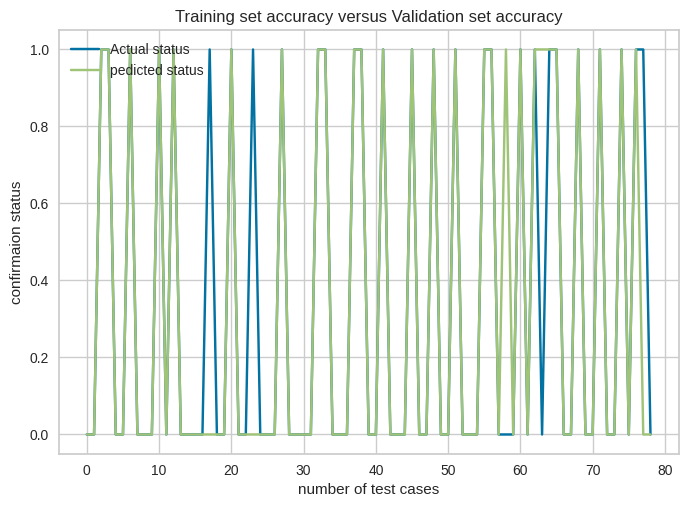

In [11]:
plt.plot(predict_x['Astatus'], label='Actual status')
plt.plot(predict_x['prediction_label'], label = 'pedicted status')
plt.xlabel('number of test cases')
plt.ylabel('confirmaion status')
plt.title('Training set accuracy versus Validation set accuracy')
plt.legend(loc='upper left');

In [12]:
if((predict_x.iloc[78,11])==1):
  print("-----YOUR TICKET WILL GET CONFIRMED-----")
else:
  print("SORRY FOR THE INCONVIENANCE YOUR TICKET WILL NOT GET CONFIRMED")


SORRY FOR THE INCONVIENANCE YOUR TICKET WILL NOT GET CONFIRMED
